# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_test.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0


In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [7]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [8]:
df_train.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [9]:
df_test.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


In [10]:
df_train.duplicated().sum()

985

In [11]:
df_test.duplicated().sum()

62

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [12]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.split()[0]) if type(x) == str else x)
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())

df_train['engine'] = df_train['engine'].apply(lambda x: float(x.split()[0]) if type(x) == str else x)
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())

df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x.split()[0]) if (type(x) == str and x != ' bhp') else np.nan)
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())

df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())

In [13]:
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.split()[0]) if type(x) == str else x)
df_test['mileage'] = df_test['mileage'].fillna(df_test['mileage'].median())

df_test['engine'] = df_test['engine'].apply(lambda x: float(x.split()[0]) if type(x) == str else x)
df_test['engine'] = df_test['engine'].fillna(df_test['engine'].median())

df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x.split()[0]) if (type(x) == str and x != ' bhp') else np.nan)
df_test['max_power'] = df_test['max_power'].fillna(df_test['max_power'].median())

df_test['seats'] = df_test['seats'].fillna(df_test['seats'].median())

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [14]:
df_train_ = df_train.drop(columns=['selling_price'])

In [15]:
df_train_.duplicated().sum()

1159

In [16]:
df_train_[df_train_.duplicated() == True]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [17]:
df_train = df_train.drop_duplicates(subset=df_train_, keep="first")

In [18]:
df_train.reset_index(inplace=True)
del df_train['index']

In [19]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [20]:
#Еденицы и змерения были убраны выше
#К типу float было приведено выше
print(df_train['mileage'].dtypes)
print(df_train['engine'].dtypes)
print(df_train['max_power'].dtypes)

print(df_test['mileage'].dtypes)
print(df_test['engine'].dtypes)
print(df_test['max_power'].dtypes)

float64
float64
float64
float64
float64
float64


In [21]:
df_train = df_train.drop('torque', axis=1)

df_test = df_test.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [22]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['engine'].astype(int)

df_test['engine'] = df_train['engine'].astype(int)
df_test['seats'] = df_train['engine'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [23]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,1429.448973
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,485.662834
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,624.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,1197.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,1248.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,1498.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,3604.000000


In [24]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [25]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338050,1451.424000,90.865230,1451.424000
std,4.012149,7.585539e+05,48486.218662,3.951748,521.624639,34.887729,521.624639
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,624.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.000000,69.000000,1197.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,1248.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1498.000000,102.000000,1498.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,2997.000000,280.000000,2997.000000


In [26]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [27]:
assert df_train.shape == (5840, 13)

AssertionError: 

Мы удалили столбец torque поэтому у нас не 13 столбцов а 12

In [28]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

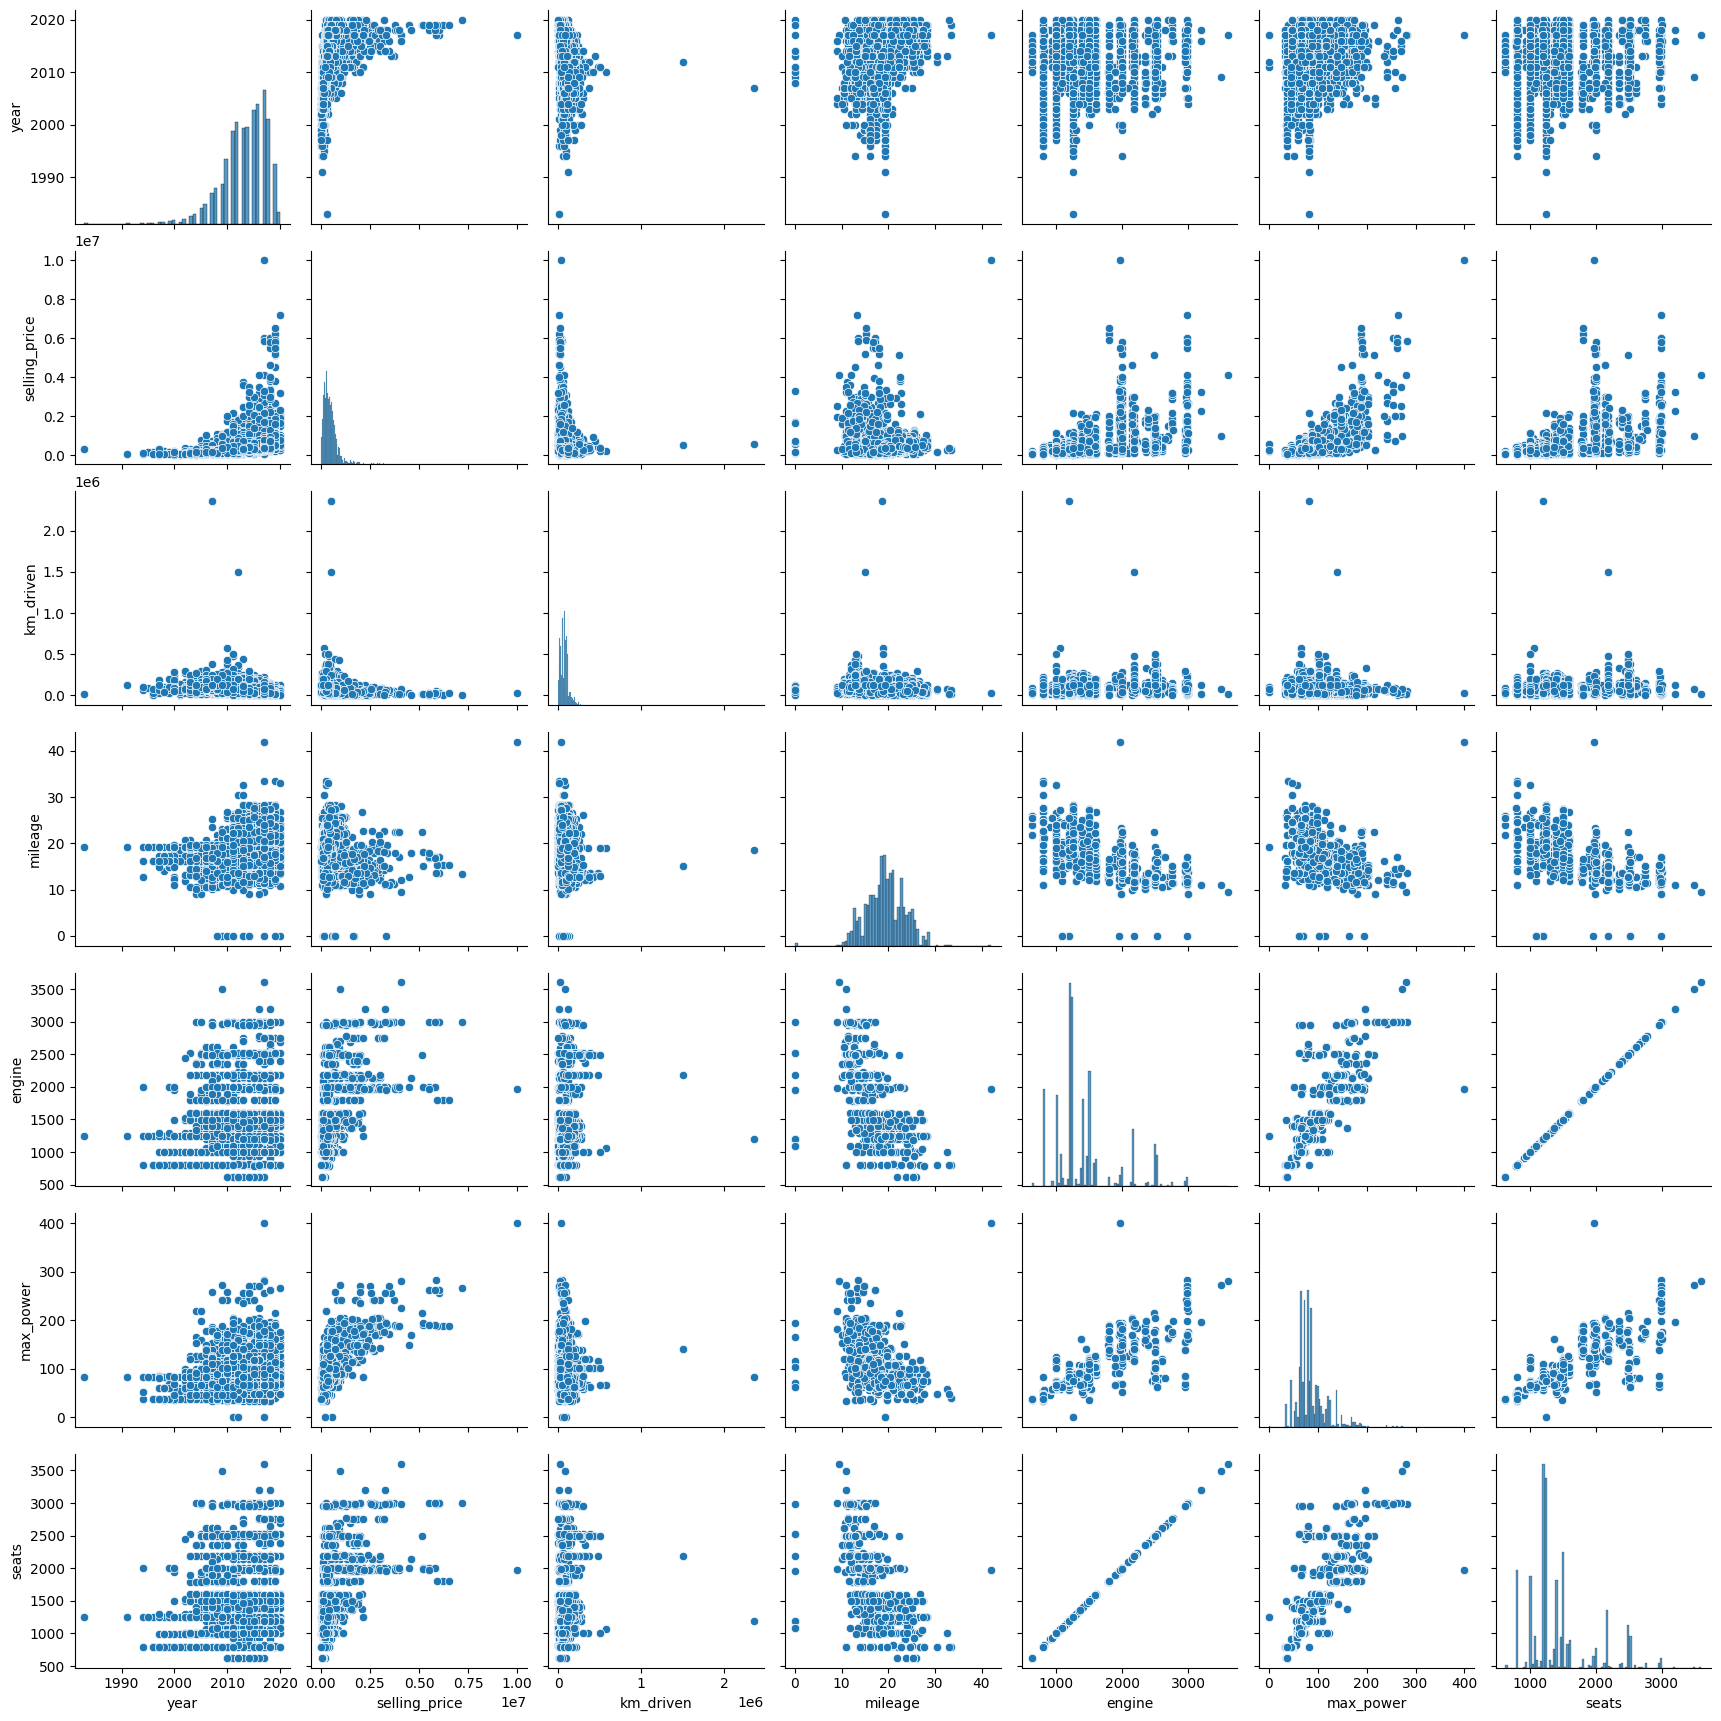

In [29]:
sns.pairplot(df_train.select_dtypes(include=np.number))

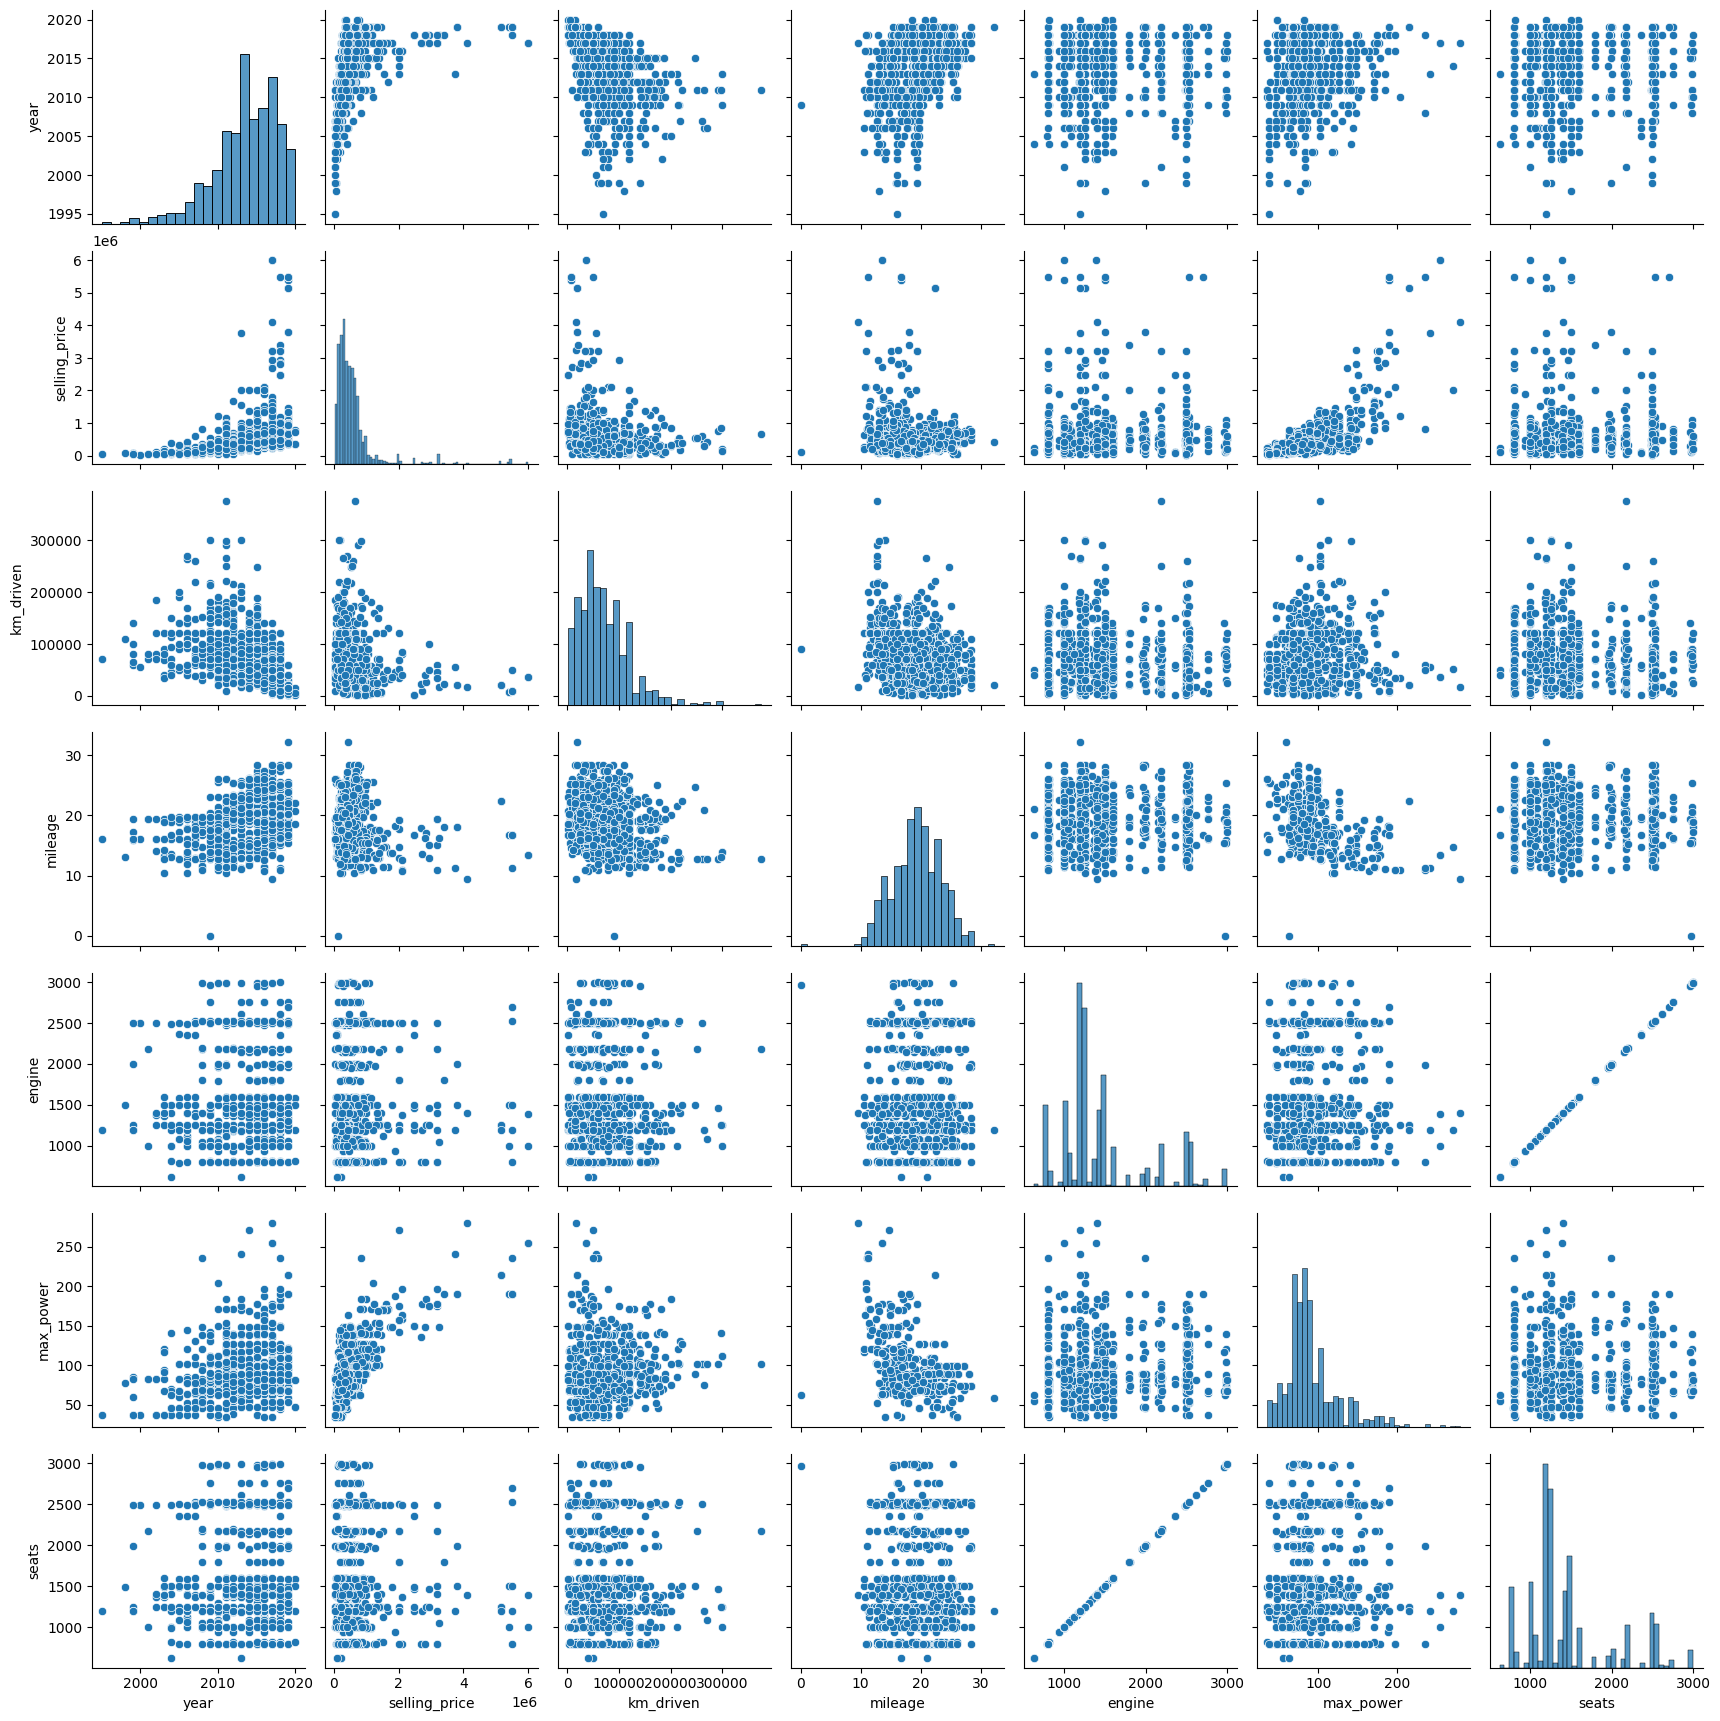

In [30]:
sns.pairplot(df_test.select_dtypes(include=np.number))

 Совокупности оказались похожими при разделении на трейн и тест.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [31]:
numeric_corr = df_train.select_dtypes(include=np.number).corr()
numeric_corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.002819
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.447672
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.229766
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.572677
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,1.000000
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.681082
seats,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,1.000000


<Axes: >

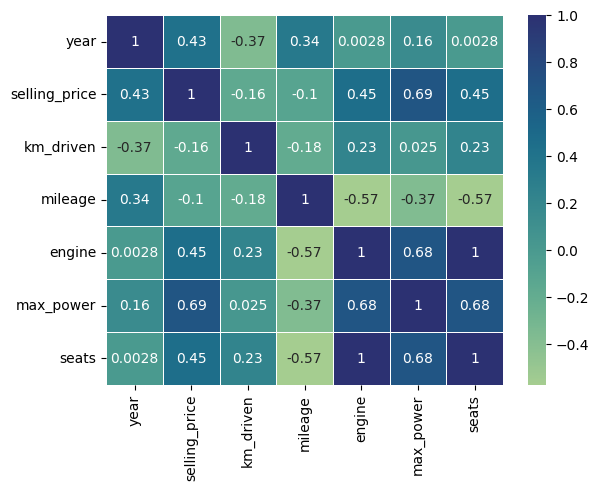

In [32]:
sns.heatmap(numeric_corr, annot=True, cmap="crest", linewidth=.5)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- **engine** и **year** наименее скоррелированы между собой
- Между **max_power** и **selling_price** наблюдается довольно сильная положительная линейная зависимость
- Между year и km_driven наблюдается отрицательная корреляция поэтому чем меньше год, тем скорее всего больше проехала машина.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [33]:
import seaborn as sns

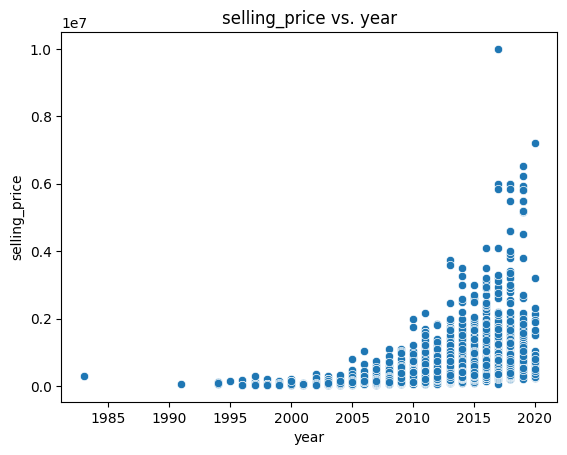

In [34]:
plt.title('selling_price vs. year')
sns.scatterplot(x=df_train['year'], y=df_train['selling_price']);

Можно заметить что более новые автомобили имебт более высокую цену.

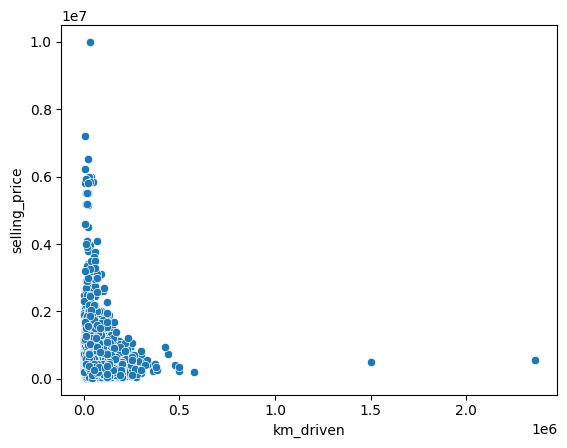

In [35]:
sns.scatterplot(x=df_train['km_driven'], y=df_train['selling_price']);

У машин с меньшим пробегом как правило выше цена.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [36]:
df_train_cat = df_train.select_dtypes(include='object')
df_test_cat = df_test.select_dtypes(include='object')

In [37]:
df_train = df_train.select_dtypes(include=np.number)
df_test = df_test.select_dtypes(include=np.number)

In [38]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)

In [39]:
assert X_train.shape == (5840, 6)

In [40]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)

In [41]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [49]:
print(MSE(y_train, pred_train))
print(r2_score(y_train, pred_train))

117125315893.244
0.5913829372433583


In [50]:
print(MSE(y_test, pred_test))
print(r2_score(y_test, pred_test))

245703643929.17392
0.5725618681968949


Разница между ошибкой в тренировочных данных и в тестовых очень маленькая, модель не переобучилась.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
train_x_scaler = scaler.transform(X_train)
test_x_scaler = scaler.transform(X_test)

In [52]:
model = LinearRegression()
model.fit(train_x_scaler, y_train)

pred_train = model.predict(train_x_scaler)
pred_test = model.predict(test_x_scaler)

print(MSE(y_train, pred_train))
print(r2_score(y_train, pred_train))
print()
print(MSE(y_test, pred_test))
print(r2_score(y_test, pred_test))

117125315893.24414
0.5913829372433579

245703643929.1572
0.572561868196924


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [53]:
max_v = [(i, abs(n)) for i,n in zip(X_train.columns, model.coef_)]
print(sorted(max_v, key=lambda x: x[1], reverse=True)[0])

('max_power', 332281.7664913662)


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_x_scaler, y_train)

pred_lasso_train = lasso.predict(train_x_scaler)
pred_lasso_test = lasso.predict(test_x_scaler)

print(MSE(y_train, pred_lasso_train))
print(r2_score(y_train, pred_lasso_train))
print()
print(MSE(y_test, pred_lasso_test))
print(r2_score(y_test, pred_lasso_test))

117125315895.49362
0.5913829372355102

245704013786.58936
0.5725612247747618


In [55]:
lasso.coef_

array([ 148437.61262558,  -45339.16591029,   33379.09016213,
        268748.74181603,  332281.34185153, -226266.82480398])

Модель не занулила никакие веса

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [56]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}
gs = GridSearchCV(lasso, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(train_x_scaler, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [57]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(121538197545.85457, Lasso(alpha=10), {'alpha': 10})

In [58]:
pred_grs_train = gs.predict(train_x_scaler)
pred_grs_test = gs.predict(test_x_scaler)

print(MSE(y_train, pred_grs_train))
print(r2_score(y_train, pred_grs_train))
print()
print(MSE(y_test, pred_grs_test))
print(r2_score(y_test, pred_grs_test))

117125316118.00153
0.5913829364592431

245707201344.19876
0.5725556795429216


In [59]:
gs.best_estimator_.coef_

array([ 148431.8467673 ,  -45334.88866813,   33376.55143087,
        268419.32143429,  332277.88880153, -225928.47299394])



*   Грид-сёрчу пришлось обучать 50 моделей




In [60]:
#Коэффициент регуляризации у лучшей из перебранных моделей
gs.best_estimator_.coef_
#коэффициенты не занулились

array([ 148431.8467673 ,  -45334.88866813,   33376.55143087,
        268419.32143429,  332277.88880153, -225928.47299394])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [61]:
from sklearn.linear_model import ElasticNet

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10], 'l1_ratio': np.arange(1, 1.1, 0.9), 'max_iter': [300, 4000, 500]}

elastic_net = ElasticNet()

gs = GridSearchCV(elastic_net, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(train_x_scaler, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': array([1.]),
                         'max_iter': [300, 4000, 500]},
             scoring='neg_mean_squared_error')

In [62]:
-gs.best_score_, gs.best_estimator_, gs.best_params_

(121538197545.85457,
 ElasticNet(alpha=10, l1_ratio=1.0, max_iter=300),
 {'alpha': 10, 'l1_ratio': 1.0, 'max_iter': 300})

In [63]:
pred_els_train = gs.predict(train_x_scaler)
pred_els_test = gs.predict(test_x_scaler)

print(MSE(y_train, pred_els_train))
print(r2_score(y_train, pred_els_train))
print()
print(MSE(y_test, pred_els_test))
print(r2_score(y_test, pred_els_test))

117125316118.00153
0.5913829364592431

245707201344.19876
0.5725556795429216


In [64]:
#Лучшие гиперпараметры
gs.best_estimator_.coef_

array([ 148431.8467673 ,  -45334.88866813,   33376.55143087,
        268419.32143429,  332277.88880153, -225928.47299394])

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [65]:
df_train_cat = df_train_cat.drop('name', axis=1)

In [66]:
X_train_cat = pd.concat([X_train, df_train_cat], axis=1)

In [67]:
assert X_train_cat.shape == (5840, 10)

In [68]:
df_test_cat = df_test_cat.drop('name', axis=1)
X_test_cat = pd.concat([X_test, df_test_cat], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [69]:
from pandas import get_dummies

In [70]:
cat_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

X_train_enc = pd.get_dummies(X_train_cat, columns=cat_columns, drop_first=True)
X_test_enc = pd.get_dummies(X_test_cat, columns=cat_columns, drop_first=True)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [71]:
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()

gs = GridSearchCV(ridge, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_enc, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [73]:
pred_rig_train = gs.predict(X_train_enc)
pred_rig_test = gs.predict(X_test_enc)

print(MSE(y_train, pred_els_train))
print(r2_score(y_train, pred_els_train))
print()
print(MSE(y_test, pred_els_test))
print(r2_score(y_test, pred_els_test))

117125316118.00153
0.5913829364592431

245707201344.19876
0.5725556795429216


Качество прогноза улучшить не удалось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    # your code here

business_metric(# your code here)

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

**кот Сабрины Садиех**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

